In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pickle
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
l = os.listdir('./pickles_C')

In [4]:
l

['014.pkl',
 '015.pkl',
 '012.pkl',
 '013.pkl',
 '007.pkl',
 '038.pkl',
 '103.pkl',
 '077.pkl',
 '063.pkl',
 '062.pkl',
 '076.pkl',
 '102.pkl',
 '048.pkl',
 '049.pkl',
 '105.pkl',
 '065.pkl',
 '071.pkl',
 '070.pkl',
 '104.pkl',
 '099.pkl',
 '098.pkl',
 '135.pkl',
 '082.pkl',
 '096.pkl',
 '041.pkl',
 '055.pkl',
 '054.pkl',
 '040.pkl',
 '083.pkl',
 '134.pkl',
 '078.pkl',
 '079.pkl',
 '133.pkl',
 '084.pkl',
 '053.pkl',
 '047.pkl',
 '046.pkl',
 '052.pkl',
 '085.pkl',
 '091.pkl',
 '132.pkl',
 '009.pkl',
 '022.pkl',
 '036.pkl',
 '023.pkl',
 '150.pkl',
 '024.pkl',
 '025.pkl',
 '031.pkl',
 '151.pkl']

In [5]:
X_temp = []
y_temp = []

In [6]:
for i in tqdm(range(0,50)):
    with open('./pickles_C/'+l[i],'rb') as infile:
        X = pickle.load(infile)
    X_temp.extend(X)
    y_temp.extend([l[i].split(".")[0]]*len(X))

100%|██████████| 50/50 [00:02<00:00, 18.58it/s]


In [7]:
len(X)

753

In [8]:
X_temp = np.array(X_temp)

In [9]:
H,V = X_temp[0].shape

In [10]:
X_temp = np.array(X_temp).reshape(-1,H,V,1)

In [11]:
X_temp.shape

(32431, 240, 320, 1)

In [12]:
enc = LabelEncoder()
enc.fit(y_temp)
y_lab = enc.transform(y_temp)

In [13]:
y_lab

array([ 4,  4,  4, ..., 49, 49, 49])

In [14]:
y_enc = to_categorical(y_lab)

In [15]:
y_enc[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [16]:
y_enc.shape[1]

50

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_temp,y_enc)

In [18]:
X_train.shape[1:]

(240, 320, 1)

In [19]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(75,activation="relu"))
model.add(Dense(y_enc.shape[1],activation="sigmoid"))
model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
history = model.fit(X_train,y_train,epochs=2,batch_size=64,validation_split=0.05)

Train on 23106 samples, validate on 1217 samples
Epoch 1/2
23106/23106 [==============================] - 997s 43ms/sample - loss: 0.0969 - acc: 0.9814 - val_loss: 0.0309 - val_acc: 0.9896
Epoch 2/2
23106/23106 [==============================] - 1012s 44ms/sample - loss: 0.0130 - acc: 0.9957 - val_loss: 0.0225 - val_acc: 0.9927


In [20]:
model.evaluate(X_test,y_test)

8108/8108 [==============================] - 97s 12ms/sample - loss: 0.0213 - acc: 0.9932


[0.021312868603944896, 0.99315655]

In [21]:
model.save("model_C.h5")

In [21]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [22]:
model = load_model("model_C.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


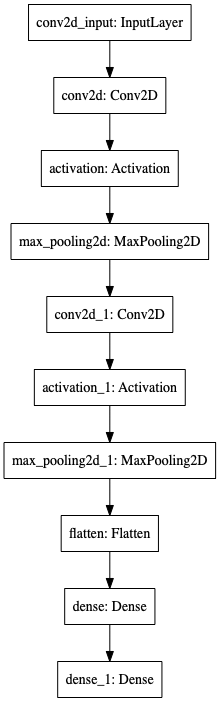

In [25]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 238, 318, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 157, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 117, 157, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 78, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 289536)            0

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [31]:
matrix

array([[172,   0,   0, ...,   0,   0,   0],
       [  0, 173,   0, ...,   0,   0,   1],
       [  1,   1, 146, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 144,   1,   4],
       [  0,   0,   0, ...,   1, 157,   0],
       [  0,   0,   0, ...,   7,   0, 141]])

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

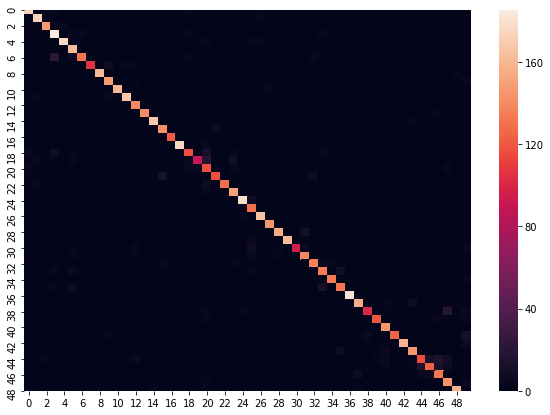

In [33]:
plt.figure(figsize = (10,7))
sn.heatmap(matrix)

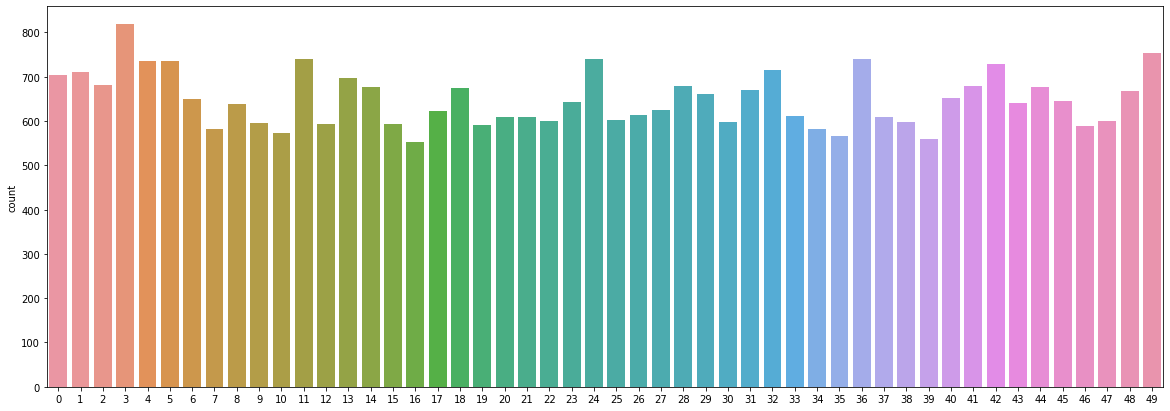

In [37]:
plt.figure(figsize = (20,7))
sn.countplot(x = y_lab)

In [41]:
y_enc.shape

(32431, 50)